In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In a dataframe named "king_county_df" load "kc_house_data.csv" file in the cell below using "pd.read_csv" format

In [3]:
file_path = "C:/Users/MARY/Desktop/Phase_2/Phase-2-Group-17-Project/data/kc_house_data.csv"

king_county_df = pd.read_csv(file_path)
king_county_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
# Understanding our columns
king_county_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Now lets get familiar with the data we have in our king_county_df. This step will include
1. Understanding the dimentionality of our dataset
2. Investigating what type of data it contains, and the data types used to store it
3. Dicovering how missing values are encoded, and how many there are
4. Getting a feel for what information it does and doesn't contain

In the cell below,lets inspect the overall shape of the dataframe

Let's look at the shape printout:

In [5]:
#Checking data shape
king_county_df.shape

(21597, 21)

# Interpretation

**Number of Rows (21597):**

This indicates we have 21,597 records or observations in our dataset. Each row provides information about a specific house sale in King County.

**Number of Columns (21):**

This indicates we have 21 different variables or features for each house sale. These variables contain information that can be used for analysis, such as numerical data (e.g., price, area sizes) and categorical data (e.g., waterfront status, condition).

**Let's look at the info printout:**

In [6]:
#Checking dataframe info
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [7]:
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the columns containing
decimal numbers and full numbers are type float64 and int64 respectively.

Some columns have missing values, notably waterfront, view, and yr_renovated. Additionally, 
sqft_basement is stored as an object type, which might need conversion to a numerical type for analysis.
"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the columns containing\ndecimal numbers and full numbers are type float64 and int64 respectively.\n\nSome columns have missing values, notably waterfront, view, and yr_renovated. Additionally, \nsqft_basement is stored as an object type, which might need conversion to a numerical type for analysis.\n'

**Checking for missing values**

In [8]:
king_county_df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Data Cleaning Steps

1.Convert date column to datetime format.

2.Convert sqft_basement column to numeric format.

**date: We convert this column to datetime format using pd.to_datetime.**

In [9]:
king_county_df['date'] = pd.to_datetime(king_county_df['date'])


**sqft_basement: We convert this column to numeric using pd.to_numeric. Setting errors='coerce' ensures that any non-numeric values are converted to NaN.**

In [10]:
king_county_df['sqft_basement'] = pd.to_numeric(king_county_df['sqft_basement'], errors='coerce')


# Handling Missing values

 We decided to use imputation instead of dropping columns with missing values. Dropping columns with missing data can lead to a significant loss of valuable information,especially if the columns are important predictors. Imputation allows us to retain these columns and make use of the available data. Also if we drop columns with missing values, we might also end up dropping rows where those columns have missing values. This can reduce the sample size,potentially weakening the statistical power of our analysis and making our model less robust.

**waterfront: Since it's a categorical variable(likely binary), we impute missing values with 0 assuming houses without waterfront.**

In [11]:
# Impute 'waterfront' with 0 if missing
king_county_df['waterfront'].fillna(0, inplace=True)

**view: We impute missing values with the median view score, assuming a central tendency measure.**

In [12]:
# Impute 'view' with median value
median_view = king_county_df['view'].median()
king_county_df['view'].fillna(median_view, inplace=True)

**yr_renovated: We impute missing values with 0 assuming no renovation year recorded.**

In [13]:
# Impute 'yr_renovated' with 0 if missing
king_county_df['yr_renovated'].fillna(0, inplace=True)

**sqft_basement: After conversion, we check and fill any remaining NaNs with 0.**

In [14]:
# Verify if 'sqft_basement' has any remaining NaNs after conversion and fill them with 0
king_county_df['sqft_basement'].fillna(0, inplace=True)

# Verification:

**We check for any remaining missing values after these operations to ensure the dataset is clean.**

In [15]:
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [16]:
# Check for any remaining missing values in the dataset
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values were found 

**Rechecking the dataset**

In [17]:
king_county_df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# Summary Statistics

Let's generate summary statistics for numerical columns to understand the distribution of data. This will provide us with statistical information such as mean, standard deviation, minimum, maximum, and quartile values for numerical features.

In [18]:
#Summary statistics for numerical columns
king_county_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Pair Plot

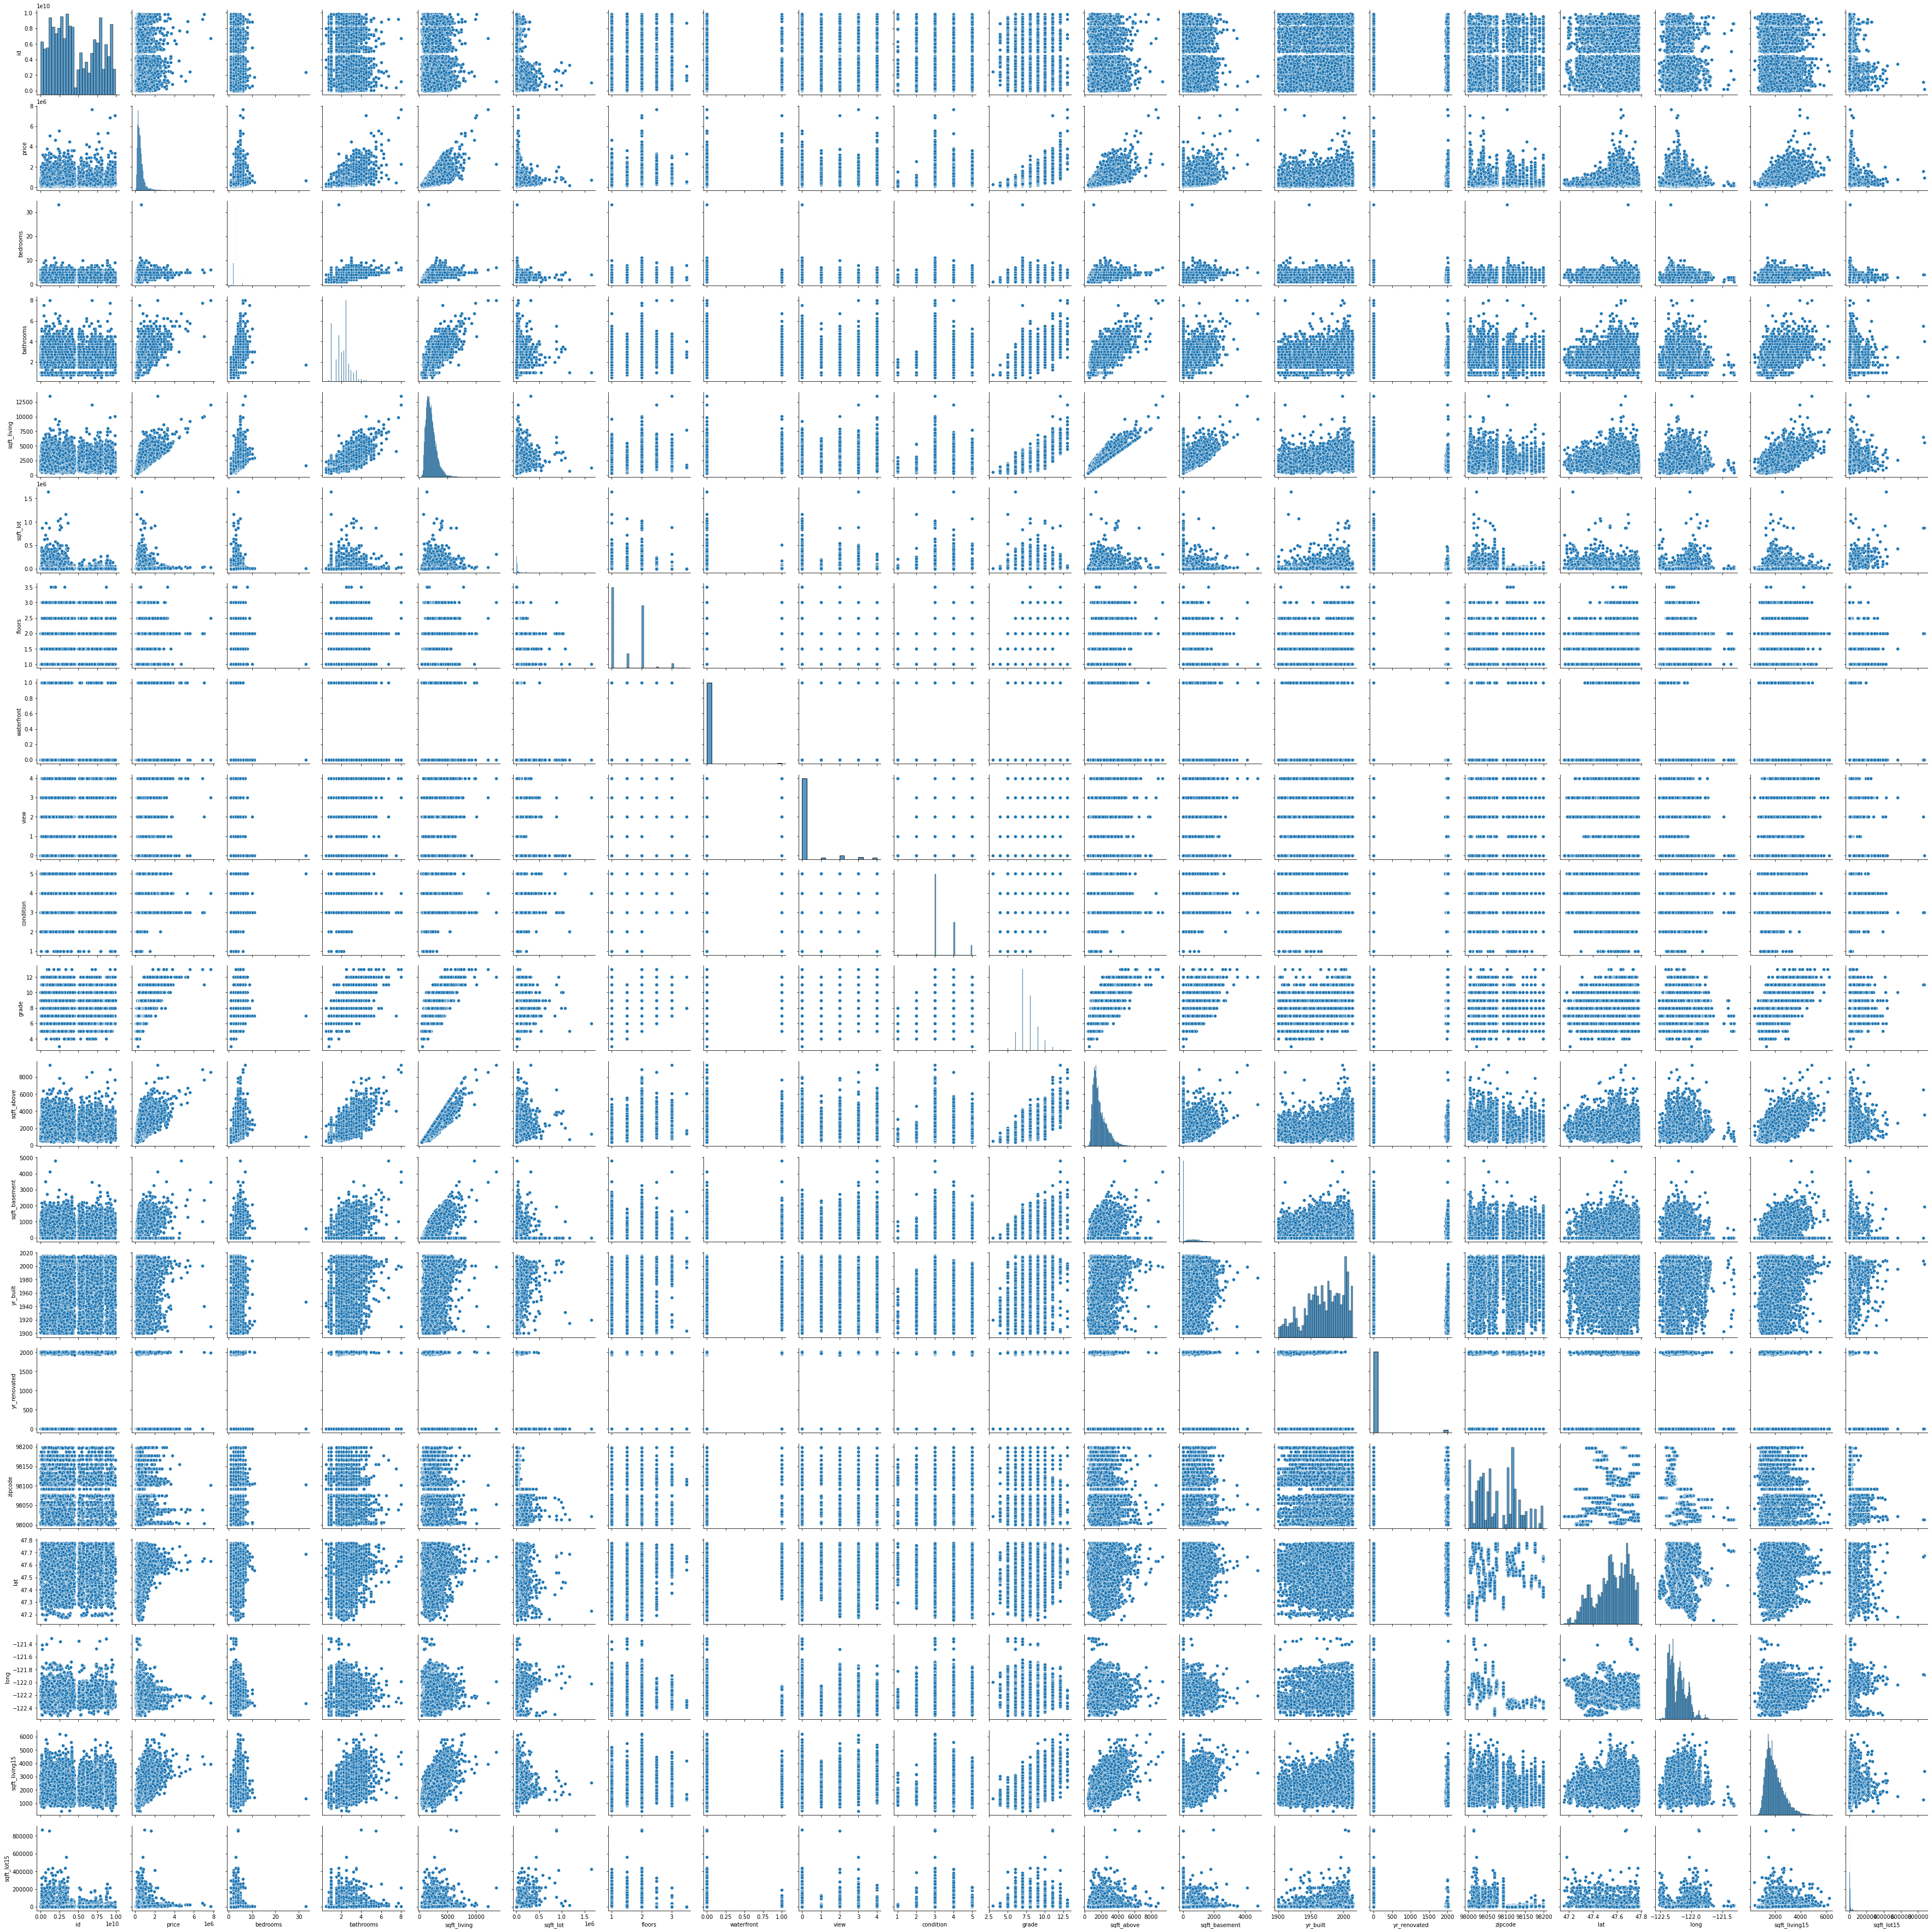

In [19]:
# We generate a pair plot for entire data set
sns.pairplot(data=king_county_df)

# Correlation Heat Map

Let's generate a correlation heat map to visualize the correlation between features.

This will help us understand which features have strong relationships with the target variable (price).

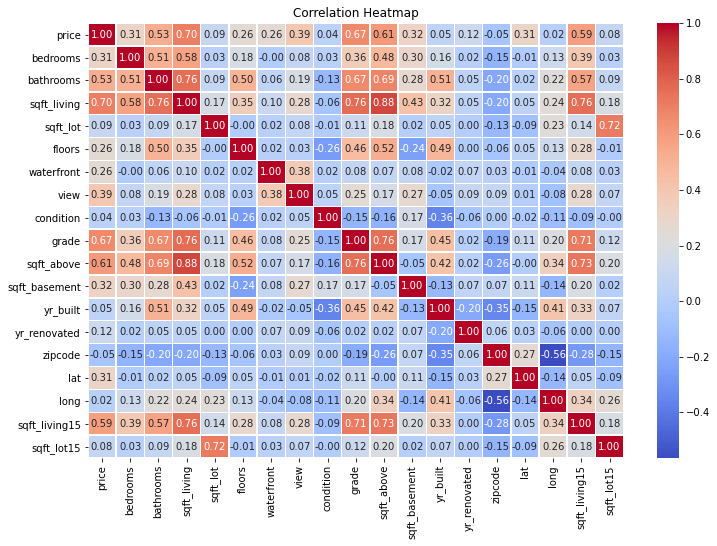

In [20]:
# Drop the 'id' column
df = king_county_df.drop(columns=['id'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Interpretation:
**Strong Positive Correlations (> 0.5):**

sqft_living (0.70), grade (0.67), sqft_above (0.61), bathrooms (0.53), sqft_living15 (0.59): These features have a strong positive correlation with price. This suggests that as these features increase (e.g., more square footage, higher grade), the house price tends to increase significantly.

**Moderate Positive Correlations (0.3 - 0.5):**

bedrooms (0.31), view (0.39), sqft_basement (0.32), floors (0.26), waterfront (0.26): These features also positively correlate with price, indicating that they contribute to higher house prices but to a lesser extent than the strongly correlated features.

**Weak Correlations (< 0.3):**

yr_renovated (0.12), condition (0.04), yr_built (0.05), sqft_lot15 (0.08), zipcode (-0.05), long (0.02): These features show weak correlations with price, suggesting that they have minimal impact on house prices or their impact is less direct.

**Negative Correlation (< 0):**

zipcode (-0.05): This indicates a very weak negative correlation with price, implying that house prices might be slightly lower in certain zip codes.

# Feature Selection

In [24]:
# Select relevant features
df = king_county_df[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'sqft_living15',
                      'sqft_basement', 'bedrooms']]


Based on the correlation analysis and considering the goal of predicting house prices (price) in King County, here are the most important features we should consider:

**Primary Features:**

**sqft_living:** Square footage of the living area (Correlation: 0.70).

**grade:** Overall grade given to the housing unit (Correlation: 0.67).

**sqft_above:** Square footage of the house above ground level (Correlation: 0.61).

**bathrooms:** Number of bathrooms in the house (Correlation: 0.53).

**sqft_living15:** Average square footage of interior housing living space for the nearest 15 neighbors (Correlation: 0.59).

**Additional Features:**

**sqft_basement:** Square footage of the basement (Correlation: 0.32).

**bedrooms:** Number of bedrooms in the house (Correlation: 0.31).

# Why These Features?

**Strong Correlation:** These features exhibit the highest correlations with price based on our analysis, indicating a strong linear relationship with house prices in King County.

**Market Relevance:** Features like sqft_living, grade, and bathrooms are fundamental factors influencing property values, reflecting buyer preferences and market dynamics in the region.

**Predictive Power:** Models incorporating these features are likely to yield more accurate predictions of house prices due to their significant impact on property valuations.

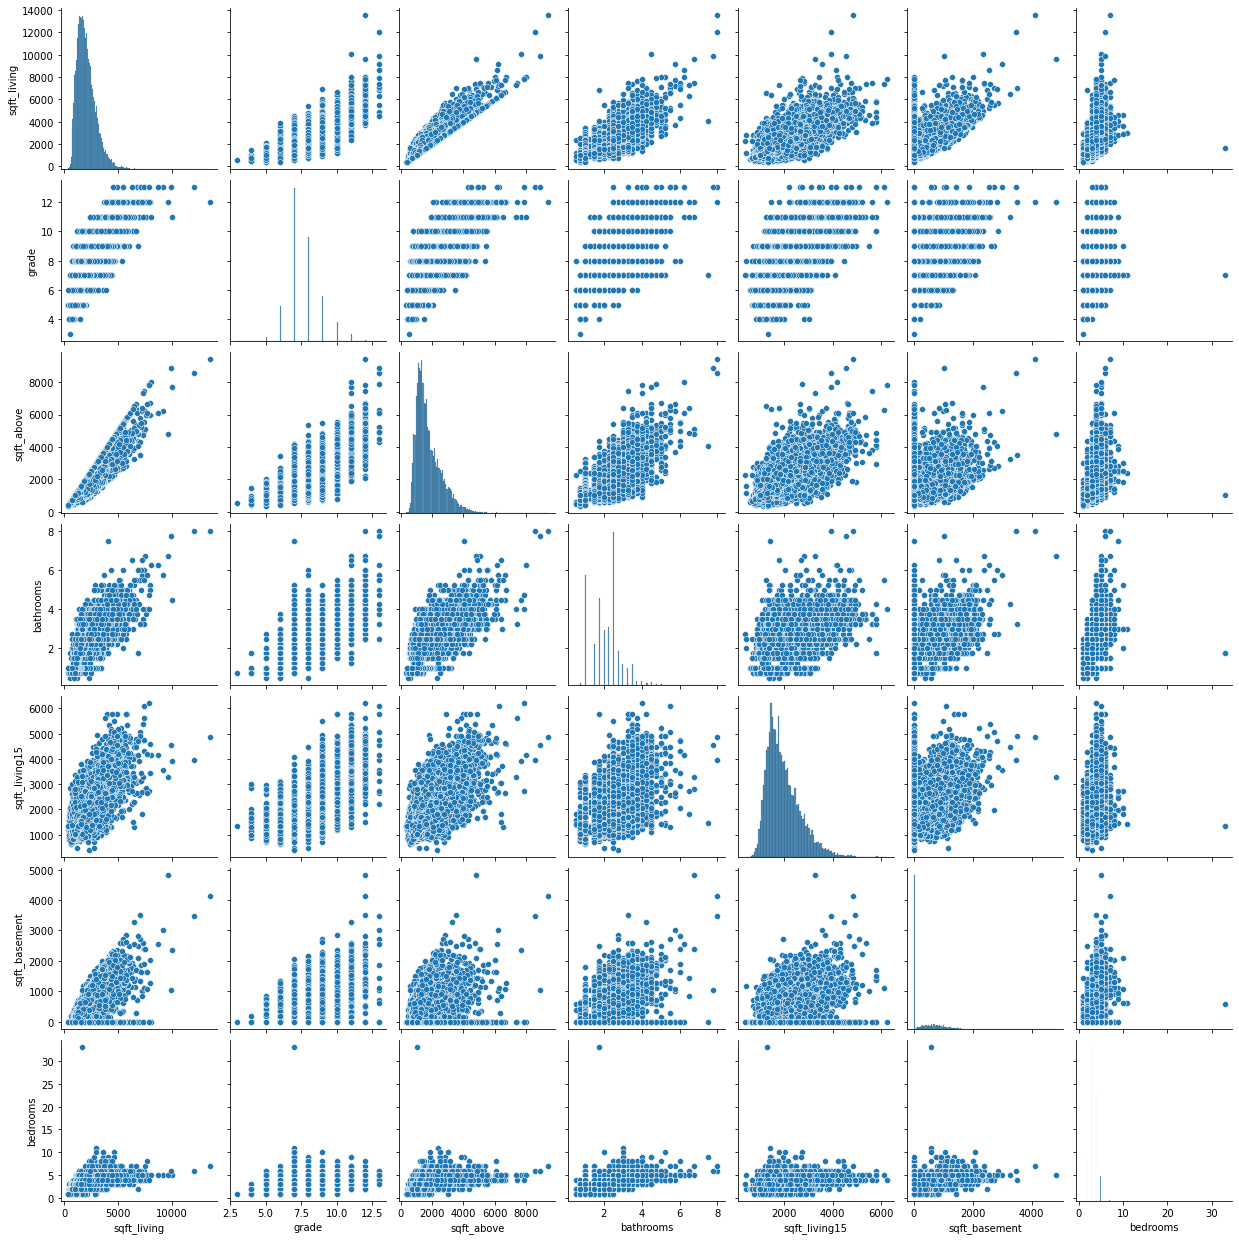

In [25]:
# Pair plot of the selected features
sns.pairplot(data=df)